# Linear Regression_Theoretical Overview

input : 1개, output : 1개

**공부시간(input)이 많을수록 성적(output)이 높을까 ? 등의 문제를 해결하고자 한다.**

1. $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가
$$ H(x) = Wx + b $$


2. $cost(W, b)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가
$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$


* cost 평가 방법 : MSE (Mean Squared Error), 
   - 실제값과 예측값과의 차이를 제곱한 것의 평균
   - cost 값이 낮을수록 좋다
   - 주로 linear regression에서 사용

# Linear Regression_basic

* Data
* Weight Initialization
* Hypothesis
* Cost(loss)
* Gradient Descent

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


# For reproducibility
torch.manual_seed(1)

## Data

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

## Weight Initialization

weight를 random으로 초기화하지 않고 다른 방법으로 초기화함으로써 성능을 향상시킬 수 있다.

1 ) 기존방법 : 난수(Uniform, Normal Distribution)

    -> 문제점 : 가중치의 초기값이 크면 gradient 소실, 신경망이 깊어질수록 vanishing gradient 발생

2 ) 방법2 : 모든 값을 0으로 or 동일하게

    -> 문제점 : 모든 뉴런이 동일한 출력값을 내보내므로 역전파시에 동일한 gradient값을 가져 학습이 잘 되지않는다.
    
3 ) 방법3 : RBM(Restricted Boltzmann Machine)

In [5]:
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

## Hypothesis

$$ H(x) = Wx + b $$

In [6]:
hypothesis = x_train * W + b

## cost(loss)
$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [7]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


## Gradient Descent

In [8]:
optimizer = optim.SGD([W, b], lr = 0.01)

# gradient 초기화
optimizer.zero_grad()

# gradient 계산
cost.backward()

# step으로 개선
optimizer.step()

## training with full code

In [22]:
# DATA
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.001)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 1000번마다 로그 출력
    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/10000 W: 0.009, b: 0.004 Cost: 4.666667
Epoch 1000/10000 W: 0.873, b: 0.290 Cost: 0.012049
Epoch 2000/10000 W: 0.900, b: 0.228 Cost: 0.007449
Epoch 3000/10000 W: 0.921, b: 0.179 Cost: 0.004606
Epoch 4000/10000 W: 0.938, b: 0.141 Cost: 0.002848
Epoch 5000/10000 W: 0.951, b: 0.111 Cost: 0.001761
Epoch 6000/10000 W: 0.962, b: 0.087 Cost: 0.001088
Epoch 7000/10000 W: 0.970, b: 0.068 Cost: 0.000673
Epoch 8000/10000 W: 0.976, b: 0.054 Cost: 0.000416
Epoch 9000/10000 W: 0.981, b: 0.042 Cost: 0.000257
Epoch 10000/10000 W: 0.985, b: 0.033 Cost: 0.000159


## 예측 어떻게하지 ?

# Linear Regression_nn.Module

## Data

In [23]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

## LinearRegressionModel 함수 설정

In [24]:
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__() #  사용할 레이어 정의 
        self.linear = nn.Linear(1, 1) # 단순선형회귀 이므로 nn.Linear(1, 1)

    def forward(self, x): # 이 모델이 어떻게 입력값에서 출력값을 계산하는지 알려줌
        return self.linear(x)

## train

In [27]:
model = LinearRegressionModel()

# 모델을 생성해서 예측값 구하기
hypothesis = model(x_train) 


# MSE(mean squared error)로 cost 구하기
cost = F.mse_loss(hypothesis, y_train)


# H의 W, b를 바꾸면서 cost 줄이기
optimizer = optim.SGD(model.parameters(), lr=0.01)

optimizer.zero_grad()
cost.backward()
optimizer.step()

## training with full code

In [29]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
model = LinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.001)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 1000번마다 로그 출력
    if epoch % 1000 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/10000 W: 0.148, b: -0.119 Cost: 3.896044
Epoch 1000/10000 W: 0.926, b: 0.169 Cost: 0.004090
Epoch 2000/10000 W: 0.942, b: 0.133 Cost: 0.002529
Epoch 3000/10000 W: 0.954, b: 0.104 Cost: 0.001563
Epoch 4000/10000 W: 0.964, b: 0.082 Cost: 0.000967
Epoch 5000/10000 W: 0.972, b: 0.065 Cost: 0.000598
Epoch 6000/10000 W: 0.978, b: 0.051 Cost: 0.000370
Epoch 7000/10000 W: 0.982, b: 0.040 Cost: 0.000228
Epoch 8000/10000 W: 0.986, b: 0.031 Cost: 0.000141
Epoch 9000/10000 W: 0.989, b: 0.025 Cost: 0.000087
Epoch 10000/10000 W: 0.991, b: 0.019 Cost: 0.000054


## 예측해보자

In [31]:
new_var = torch.FloatTensor([[4.0]])
pred_y = model(new_var)
print('input=4일 때, predict ? ', pred_y)

input=4일 때, predict ?  tensor([[3.9853]], grad_fn=<AddmmBackward>)


# Multivariable Linear Regression_Theoretical Overview

input : 여러개, output : 1개


**공부시간, 잠자는 시간, 등하교시간(input)에 따라 성적(output)이 어떻게 변할까 ? 등의 문제를 해결하고자 한다.**

1. $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가

$$ H(x_1, x_2, x_3) = x_1w_1 + x_2w_2 + x_3w_3 + b $$


2. $cost(W, b)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

# Multivariable Linear Regression_basic

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# For reproducibility
torch.manual_seed(1)

## Naive Data

In [33]:
# DATA
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [34]:
# 모델 초기화
# requires_grad :  모델의 부분을 고정하고 싶은 경우에 유용, 
#                  input에 있으면 output에서도 gradient가 필요
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)


# optimizer 설정
# sgd : 확률적 경사하강법, 신경망 학습시에는 좀 더 정교한 AdaGrad, RMSProp, Adam 등의 optimizer 사용
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w3.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.297 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.676 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.497603
Epoch  300/1000 w1: 0.684 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.678 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.678 w3: 0.678 b: 0.009 Cost: 1.319503
Epoch  600/1000 w1: 0.699 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.266215
Epoch  700/1000 w1: 0.704 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.215693
Epoch  800/1000 w1: 0.709 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.167821
Epoch  900/1000 w1: 0.713 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.122419
Epoch 1000/1000 w1: 0.718 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.079375


## Matrix Data

$$
\begin{pmatrix}
x_1 &amp; x_2 &amp; x_3
\end{pmatrix}
\cdot
\begin{pmatrix}
w_1 \\
w_2 \\
w_3 \\
\end{pmatrix}
=
\begin{pmatrix}
x_1w_1 + x_2w_2 + x_3w_3
\end{pmatrix}
$$
$$ H(X) = XW $$

위에서 한 행씩 입력했던 데이터를 행렬로 만들어 한번에 계산하자

In [35]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])


print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [36]:
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
            epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
        ))

Epoch    0/1000 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch  100/1000 hypothesis: tensor([152.7691, 183.6985, 180.9591, 197.0627, 140.1336]) Cost: 1.563634
Epoch  200/1000 hypothesis: tensor([152.7273, 183.7273, 180.9465, 197.0517, 140.1731]) Cost: 1.497608
Epoch  300/1000 hypothesis: tensor([152.6866, 183.7554, 180.9343, 197.0409, 140.2116]) Cost: 1.435026
Epoch  400/1000 hypothesis: tensor([152.6470, 183.7827, 180.9224, 197.0304, 140.2491]) Cost: 1.375730
Epoch  500/1000 hypothesis: tensor([152.6085, 183.8093, 180.9108, 197.0201, 140.2856]) Cost: 1.319511
Epoch  600/1000 hypothesis: tensor([152.5711, 183.8352, 180.8996, 197.0101, 140.3211]) Cost: 1.266222
Epoch  700/1000 hypothesis: tensor([152.5346, 183.8604, 180.8887, 197.0003, 140.3558]) Cost: 1.215696
Epoch  800/1000 hypothesis: tensor([152.4992, 183.8849, 180.8781, 196.9908, 140.3895]) Cost: 1.167818
Epoch  900/1000 hypothesis: tensor([152.4647, 183.9087, 180.8677, 196.9814, 140.4223]) Cost: 1.122429
Epoch 

# Multivariable LInear Regression_nn.Module

## 모델 정의

In [37]:
# MultivariateLinearRegressionModel은 단순Linear Regression모델과 다르게 입력 차원이 늘어나기 때문에 nn.Linear() 의 값 조정이 필요하다
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 입력 차원, 출력 차원

    def forward(self, x):
        return self.linear(x)

## train

In [40]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])


# 모델 초기화
model = MultivariateLinearRegressionModel()


# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)


nb_epochs = 10000
cost_value = []
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    # cost 계산 방법 변경 및 디버깅에 용이해서 cost 함수가 아닌 function 사용
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    cost_value.append(cost)
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/10000 Cost: 39633.414062
Epoch  100/10000 Cost: 11.480746
Epoch  200/10000 Cost: 10.894592
Epoch  300/10000 Cost: 10.339335
Epoch  400/10000 Cost: 9.813350
Epoch  500/10000 Cost: 9.315010
Epoch  600/10000 Cost: 8.842962
Epoch  700/10000 Cost: 8.395752
Epoch  800/10000 Cost: 7.972028
Epoch  900/10000 Cost: 7.570637
Epoch 1000/10000 Cost: 7.190376
Epoch 1100/10000 Cost: 6.830142
Epoch 1200/10000 Cost: 6.488811
Epoch 1300/10000 Cost: 6.165472
Epoch 1400/10000 Cost: 5.859105
Epoch 1500/10000 Cost: 5.568910
Epoch 1600/10000 Cost: 5.293930
Epoch 1700/10000 Cost: 5.033409
Epoch 1800/10000 Cost: 4.786576
Epoch 1900/10000 Cost: 4.552718
Epoch 2000/10000 Cost: 4.331151
Epoch 2100/10000 Cost: 4.121226
Epoch 2200/10000 Cost: 3.922322
Epoch 2300/10000 Cost: 3.733857
Epoch 2400/10000 Cost: 3.555312
Epoch 2500/10000 Cost: 3.386099
Epoch 2600/10000 Cost: 3.225775
Epoch 2700/10000 Cost: 3.073870
Epoch 2800/10000 Cost: 2.929914
Epoch 2900/10000 Cost: 2.793547
Epoch 3000/10000 Cost: 2.664297
E

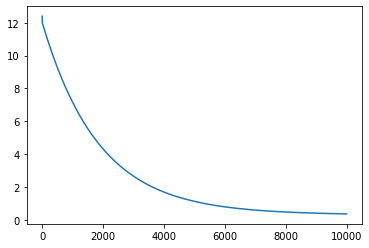

In [41]:
plt.plot(cost_value[10:])

## Minibatch



데이터 양이 방대하여 한 번에 학습이 불가능하거나 시간이 오래 걸리는 경우가 있다.

따라서 전체 데이터를 균일하게 나누어 하나씩 minibatch를 수행해보자.

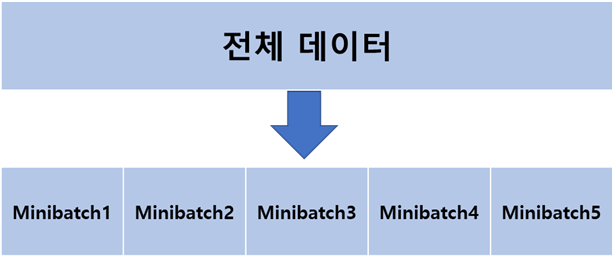

효과 : 업데이트를 좀 더 빠르게 할 수 있다

주의 : 전체 데이터를 쓰지 않아서 매끄럽게 cost가 줄어들지는 않는다.

In [42]:
from torch.utils.data import Dataset

class CustomDataset(Dataset) :
    def __init__(self) :
        self.x_data = [[73, 80, 75],
                     [93, 88, 93],
                     [89, 91, 90],
                     [96, 98, 100],
                     [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    
    
    # 데이터셋의 총 데이터 수
    def __len__(self) :
        return len(self.x_data)
    
    # 어떠한 인덱스 idx를 받았을 때, 그에 상응하는 입출력 데이터 반환
    def __getitem__(self, idx) :
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y
    
    
dataset = CustomDataset()

from torch.utils.data import DataLoader

dataloader = DataLoader(
                dataset,
                batch_size = 2, # 각 minibatch의 크기 ( 통상적으로 2의 제곱수로 설정 )
                shuffle=True) # epoch마다 데이터셋을 섞어서 데이터 학습순서 변경

In [47]:
# 모델 초기화
model = MultivariateLinearRegressionModel()


# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 1000
cost_value = []
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader) :
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train) # or .mm or @

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        # 그래프로 확인하기 위해서
        cost_value.append(cost)
        
        if epoch % 1000 == 0 :
            
            print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 72122.617188
Epoch    0/1000 Cost: 22521.603516
Epoch    0/1000 Cost: 8282.226562
Epoch 1000/1000 Cost: 0.224621
Epoch 1000/1000 Cost: 3.068653
Epoch 1000/1000 Cost: 1.228750


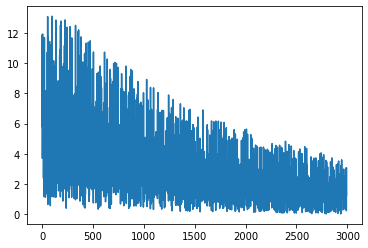

In [48]:
plt.plot(cost_value[10:])

 cost값이 어느정도 줄어들고 나서 확인하면 점차 줄어드는 것을 알 수 있다.

# 실습

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# For reproducibility
torch.manual_seed(1)

## Linear Regression

In [15]:
data = pd.read_csv('02_Linear_Regression_Model_Data.csv')
data

,Unnamed: 0,x,y
0,0,1.0,1.619379
1,1,2.0,1.857290
2,2,3.0,2.628194
3,3,4.0,2.725426
4,4,5.0,3.498926
5,5,6.0,3.867042
6,6,7.0,4.934539
7,7,8.0,4.864829
8,8,9.0,5.241539
9,9,10.0,5.823689


In [20]:
x_data = torch.FloatTensor(data.iloc[:,1])
y_data = torch.FloatTensor(data.iloc[:,2])

Epoch :  0 cost :  15.700907707214355
Epoch :  100 cost :  0.12573865056037903
Epoch :  200 cost :  0.07730412483215332
Epoch :  300 cost :  0.056429438292980194
Epoch :  400 cost :  0.04743269830942154
Epoch :  500 cost :  0.04355520382523537
Epoch :  600 cost :  0.04188404232263565
Epoch :  700 cost :  0.04116382822394371
Epoch :  800 cost :  0.04085339978337288
Epoch :  900 cost :  0.04071960970759392
Epoch :  1000 cost :  0.04066196829080582


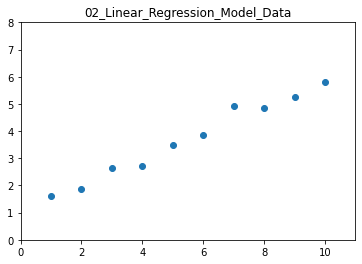

In [58]:
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

hypothesis = x_data * W + b

cost = torch.mean((hypothesis-y_data) ** 2)

optimizer = optim.SGD([W,b], lr = 0.01)

np_epochs = 1000


for i in range(np_epochs + 1 ) :
    
    # H(x)
    hypothesis = x_data * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_data)**2)

    # cost로 H 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    

    
    if i % 100 == 0 :
        print('Epoch : ', i, 'cost : ', cost.item())
        
        
plt.xlim(0, 11);    plt.ylim(0, 8)
plt.title('02_Linear_Regression_Model_Data')
plt.scatter(x_data, y_data)

plt.show()

## Logistic Regression

In [65]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [67]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)



In [68]:
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    # hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b))) 직접 계싼
    
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


### sigmoid 공부

In [60]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

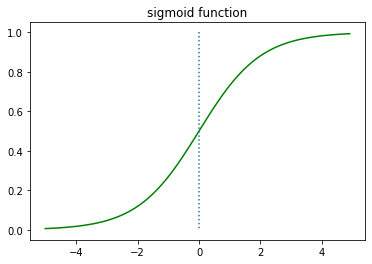

In [62]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1,0], ':')
plt.title('sigmoid function')
plt.show()

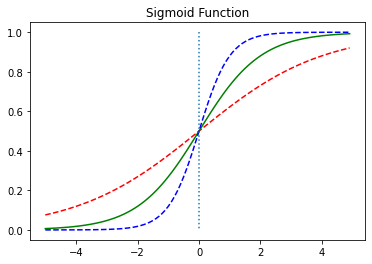

In [63]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

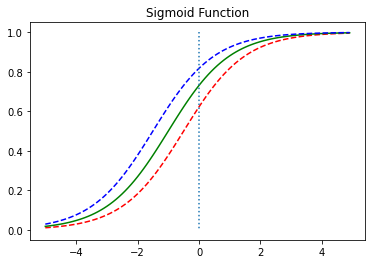

In [64]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()